In [1]:
import arma
import importlib
from logger import Logger
import matplotlib.pyplot as plt
import pandas as pd
logger = Logger(show = True, html_output = True, config_file = "config.txt")


2019.05.29-16:57:19 Initialize the logger
2019.05.29-16:57:19 Create logs folder logs
2019.05.29-16:57:19 Create log file logs\2019-05-29_16_57_19_log0.html
2019.05.29-16:57:19 Create models folder models
2019.05.29-16:57:19 Create output folder output
2019.05.29-16:57:19 Create data folder data
2019.05.29-16:57:19 Read config file config.txt


In [2]:
def parser(x):
	return pd.datetime.strptime(x, '%d/%m/%y %H')

series = pd.read_csv(logger.get_data_file(logger.config_dict['TRAIN_FILE']), header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [3]:
series.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
DATETIME,,,,,,,,,,,,,,,,,,,,,
2014-01-06 00:00:00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
2014-01-06 01:00:00,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2014-01-06 02:00:00,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
2014-01-06 03:00:00,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
2014-01-06 04:00:00,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0


In [7]:
series.tail()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
DATETIME,,,,,,,,,,,,,,,,,,,,,
2015-01-05 20:00:00,3.349998,3.393529,3.704372,3.318569,1.976920,5.500000,4.797106,96.594833,1,96.613831,...,71.224411,28.940384,84.560669,21.076448,81.414070,20.970821,71.399384,31.532953,30.632954,0
2015-01-05 21:00:00,3.262380,3.738153,3.319207,3.162533,2.355615,5.207708,3.493474,96.445862,1,96.464813,...,69.354080,29.247887,84.673790,26.999941,83.265991,26.999941,52.213036,31.836996,30.936996,0
2015-01-05 22:00:00,3.114685,3.948144,3.123156,3.060679,2.593729,4.997561,2.207609,96.929070,1,96.948166,...,86.823753,28.358240,84.593727,20.571791,81.679344,20.457272,66.498741,31.281141,30.381142,0
2015-01-05 23:00:00,2.931601,3.892631,3.542954,3.025374,2.923712,5.104730,2.071863,97.206474,1,97.225647,...,87.819832,28.297560,83.987007,20.450956,82.001610,20.337372,66.844086,31.210789,30.310789,0
2015-01-06 00:00:00,2.746997,3.828491,3.984313,2.770051,3.278352,5.246045,2.100543,96.109726,1,96.128578,...,91.279694,28.306608,86.360031,21.120661,83.284691,21.009199,68.570244,31.209398,30.309399,0


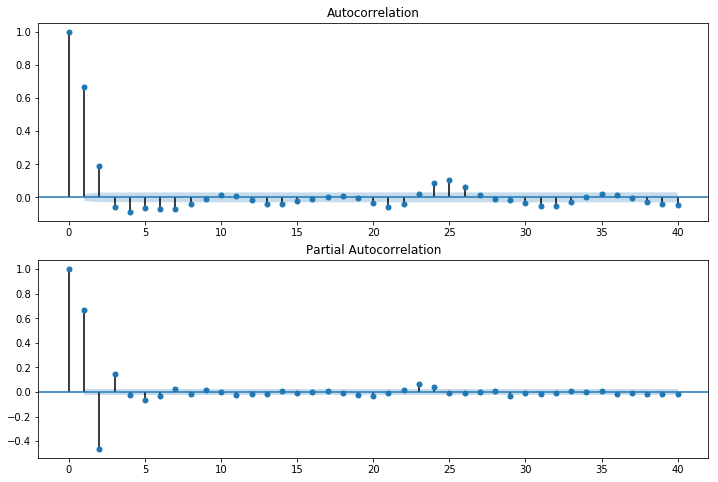

In [8]:

df1 = series['L_T7']
arma.plot_autocorrelations(df1)


In [9]:
df1_model = arma.create_model(df1, 2, 0, 3)
arma.stats(df1_model)

D:\Anaconda3\envs\cyber2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
D:\Anaconda3\envs\cyber2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


AIC: 14082.052397	BIC: 14131.598854	HQIC: 14098.934453	Durbin_Watson: 1.992674


NormaltestResult(statistic=222.74427222318752, pvalue=4.2824849851459694e-49)


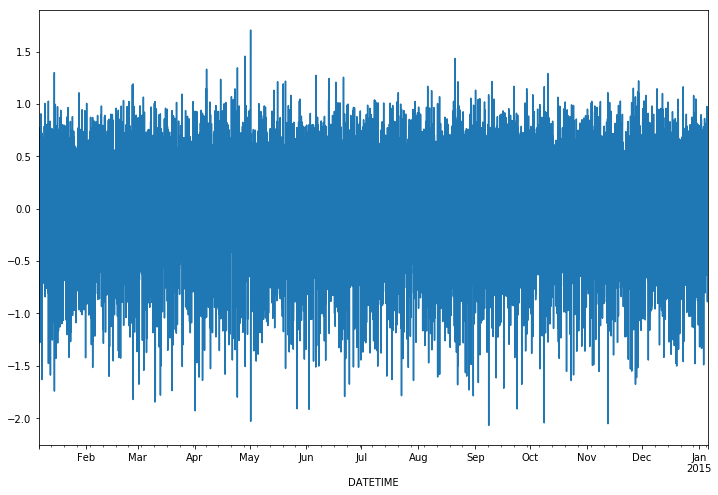

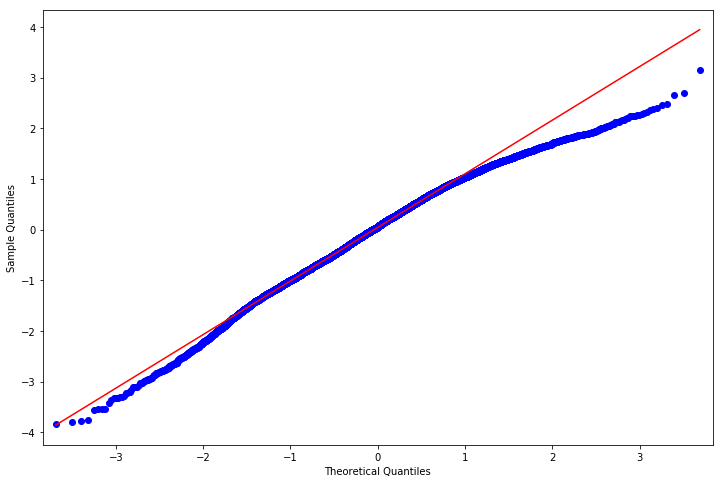

In [10]:
arma.analise_model(df1_model)

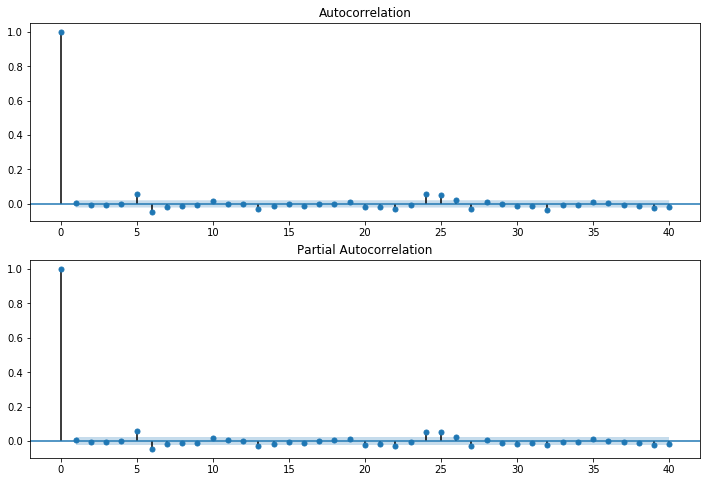

In [11]:

arma.plot_autocorrelations(df1_model.resid)

In [13]:
arma.extract_resid_stats(df1_model)

            AC           Q      Prob(>Q)
lag                                     
1.0   0.003005    0.079158  7.784419e-01
2.0  -0.005467    0.341126  8.431900e-01
3.0  -0.007714    0.862763  8.344033e-01
4.0   0.000367    0.863946  9.296754e-01
5.0   0.059464   31.867448  6.311339e-06
6.0  -0.044859   49.513698  5.883647e-09
7.0  -0.016853   52.004727  5.826049e-09
8.0  -0.010080   52.895920  1.129649e-08
9.0  -0.008048   53.464068  2.386552e-08
10.0  0.018969   56.620663  1.570420e-08
11.0 -0.001082   56.630941  3.890677e-08
12.0  0.000571   56.633806  9.202925e-08
13.0 -0.030750   64.932193  6.782566e-09
14.0 -0.014694   66.827197  7.205052e-09
15.0 -0.002166   66.868366  1.603793e-08
16.0 -0.010895   67.910526  2.310851e-08
17.0 -0.000419   67.912064  4.919432e-08
18.0  0.001907   67.943999  1.003534e-07
19.0  0.012589   69.335879  1.185615e-07
20.0 -0.020384   72.985376  5.885597e-08
21.0 -0.015650   75.136705  5.159075e-08
22.0 -0.028030   82.038933  7.461195e-09
23.0 -0.006099  

Mean Forecast Error: 0.025199719626102436 Mean Absolute Error: 0.007844060300378502 Mean Square error:  0.28590986765350074


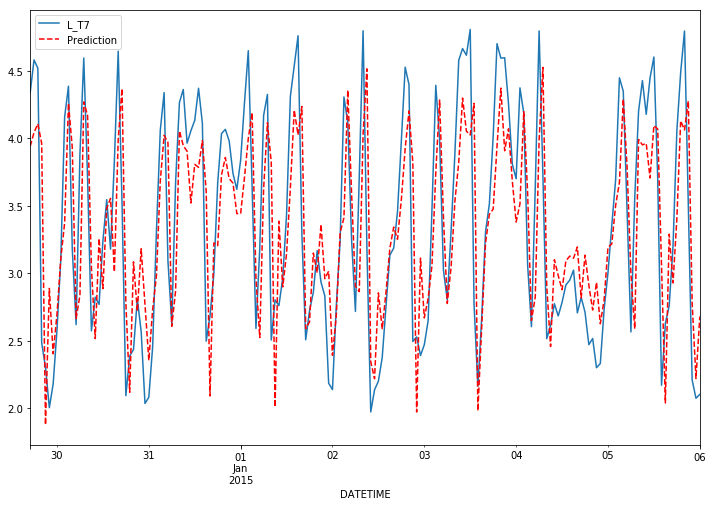

In [14]:
arma.plot_predictions(df1, df1_model)

In [11]:





importlib.reload(arma)

<module 'arma' from '/Users/mihaivo/PycharmProjects/CyberAnomDetect2/arma.py'>

In [12]:
a = df1.at(0)


In [13]:

df1.index[0]


Timestamp('2014-01-06 00:00:00')

In [14]:
len(df1)

8761

In [17]:
series.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
DATETIME,,,,,,,,,,,,,,,,,,,,,
2014-01-06 00:00:00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
2014-01-06 01:00:00,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2014-01-06 02:00:00,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
2014-01-06 03:00:00,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
2014-01-06 04:00:00,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


AIC: -13038.323699	BIC: -13010.011438	HQIC: -13028.676810	Durbin_Watson: 1.709070
NormaltestResult(statistic=2714.340972100521, pvalue=0.0)
            AC           Q       Prob(>Q)
lag                                      
1.0   0.125958  139.045254   4.305261e-32
2.0  -0.092130  213.441273   4.485559e-47
3.0  -0.055633  240.572076   7.158040e-52
4.0   0.005936  240.881014   5.993989e-51
5.0   0.047377  260.561878   2.974286e-54
6.0   0.005719  260.848643   1.966905e-53
7.0  -0.033405  270.634787   1.114933e-54
8.0  -0.064502  307.126687   1.251729e-61
9.0  -0.007270  307.590308   6.400290e-61
10.0  0.067232  347.246008   1.530271e-68
11.0  0.052974  371.868371   5.670879e-73
12.0 -0.005881  372.171882   2.917780e-72
13.0 -0.032762  381.591801   1.717663e-73
14.0 -0.035980  392.954304   3.863625e-75
15.0 -0.055515  420.007815   4.289375e-80
16.0 -0.037802  432.553273   5.359287e-82
17.0 -0.002633  432.614163   2.754965e-81
18.0 -0.010633  433.606917   8.764216e-81
19.0 -0.005937  433.

ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11b1d97b8> (for post_execute):


ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

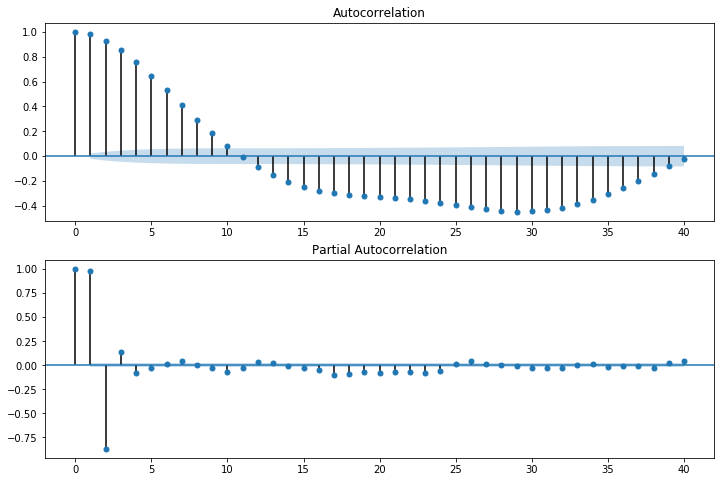

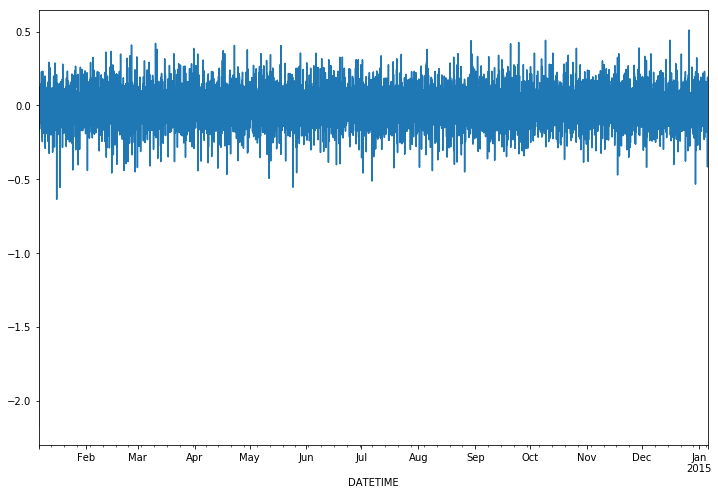

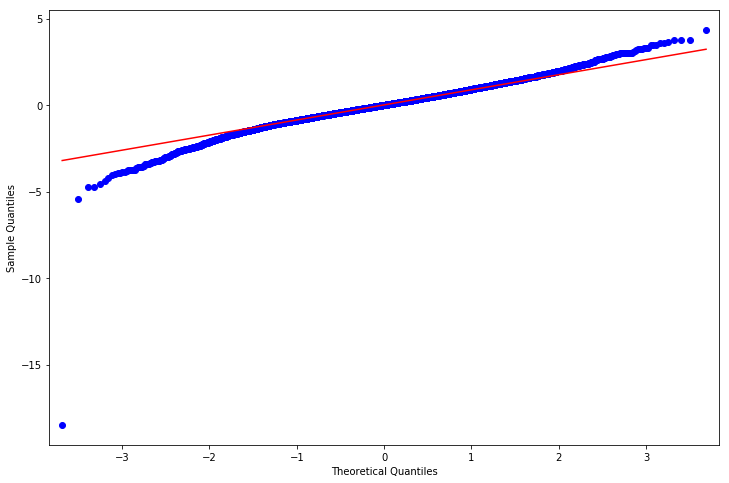

ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [19]:
arma.answer(series, 'L_T1', 2, 0)